# Exploratory Data Analysis Starter

## Import packages

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Shows plots in jupyter notebook
%matplotlib inline

sns.set(color_codes=True)

---

## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the `read_csv` method accordingly.

In [3]:
client_df = pd.read_csv('./client_data.csv')
price_df = pd.read_csv('./price_data.csv')

You can view the first 3 rows of a dataframe using the `head` method. Similarly, if you wanted to see the last 3, you can use `tail(3)`

In [55]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


---

## Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [5]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [4]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [56]:
client_df['churn'] = client_df['churn'].astype('category')

### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [5]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000


From statistics summary we can see that some columns have high ranges, and quite differences i.e. 25, 50% of data are 0, only small portion of entries has values above 0 . So might be interesting to check these, also there are values within 25,50 and 75 % of data very low comparing to max value. Seems like for lot of clients consumption of gas or electricity is not available. This might be due to fact that their contract just started, and thus no historical data are available, or some other reasons.


In [5]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


Price statistics also shows different ranges and sometimes that 25% of data has 0 values. Could be that services in that price segment are not consumed. 

---

## Data visualization

If you're working in Python, two of the most popular packages for visualization are `matplotlib` and `seaborn`. We highly recommend you use these, or at least be familiar with them because they are ubiquitous!

Below are some functions that you can use to get started with visualizations. 

In [4]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=120):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

The first function `plot_stacked_bars` is used to plot a stacked bar chart. An example of how you could use this is shown below:

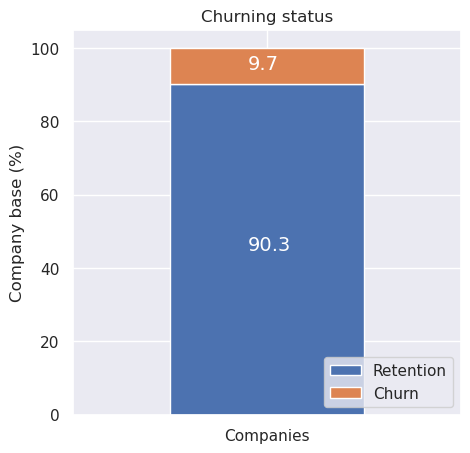

In [7]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

For calculating price sensitivity we could calculate the change between consuption last month , with average monthly consumption in the last 12 months and put that in ration with percentage of customer who churned. 

In [57]:
avg_monthly_past12= client_df['cons_12m'].sum()/12
std_monthly_past12 =client_df['cons_12m'].std()
print('Average monthly electricity consumption for period of past 12 months:',avg_monthly_past12)
print('Standard deviation from mean of electricity consumption of last 12 months:', std_monthly_past12)
current_paid = client_df['imp_cons'].sum()
print('Current paid consumption',current_paid) #it seems like month? 

average_last_month = client_df['cons_last_month'].sum()/12
print('Average consumption last month:',average_last_month)


Average monthly electricity consumption for period of past 12 months: 193797625.08333334
Standard deviation from mean of electricity consumption of last 12 months: 573465.2641977974
Current paid consumption 2231605.4
Average consumption last month: 19584540.0


It seems like average electricity consumption  is significantly lower than  average monthly consumption in last 12 months. 
Not sure what current paid consumption means, but it is much lower than the monthly figures . It might be better to check and compare the values per client and then to see if the reason why particular company churned is actually related to changed consumption, Or maybe because of missing data 

We will calculate the electricity monthly consumption rate, and then check if for particular customer consumption last month increased or not and then compared that if hes action was to cancel the contract or not. It might be that change in consumption (decrease or increase ) led to contract cancelation 

- rate = consumption last month - average monthly consumption in last 12 months /total consumption in past 12 months 


In [86]:
client_df['consumption_rate'] = ((client_df['cons_last_month'] -avg_monthly_past12)/client_df['cons_12m'])*100
client_df['consumption_rate'].replace([np.inf, -np.inf], 0, inplace=True)

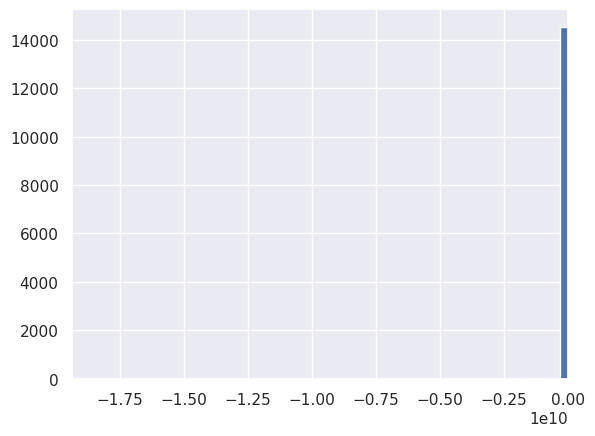

In [87]:

plt.hist(client_df['consumption_rate'], bins=60)
plt.xlim(np.min(client_df['consumption_rate']), np.max(client_df['consumption_rate']))
#plt.xlim(np.min(client_df['consumption_rate'])-0.005, np.max(client_df['consumption_rate'])+0.05)
plt.show()


Change rate is very close to 0 

In [13]:
cons_last_year = client_df[client_df['cons_12m']>0][['cons_last_month','churn']]
cons_last_year.value_counts()

cons_last_month  churn
0                0        4406
                 1         460
382647           0          27
509826           0          24
558120           0          18
                          ... 
2707             0           1
2711             0           1
2714             0           1
2715             0           1
2753             0           1
Length: 5249, dtype: int64

In the previous 2-3 cells we filtered only rows where consumption last 12m is higher than 0, and then also added consumption last month and churn info. So even when there is consumption in last 12 months is given, there are still over 4800 entries  where consumption last month is 0 , or empty. This means that consumption rate is not showing the true rate. And we cannot identify properly change in consumption last month comparing to last 12 months  

In [17]:
client_df[client_df['churn']==1]['cons_last_month'].value_counts()

0        470
51900     12
73783      7
9039       7
3905       7
        ... 
3765       1
1455       1
1430       1
1495       1
179        1
Name: cons_last_month, Length: 770, dtype: int64

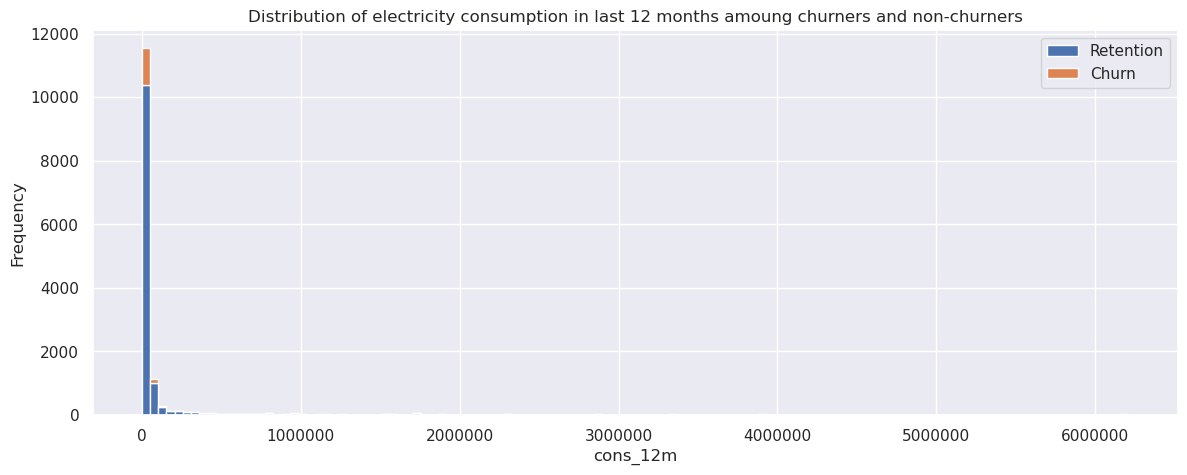

In [12]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=1, figsize=(14, 5))

plot_distribution(consumption, 'cons_12m', axs)
plt.title('Distribution of electricity consumption in last 12 months amoung churners and non-churners')
plt.show()

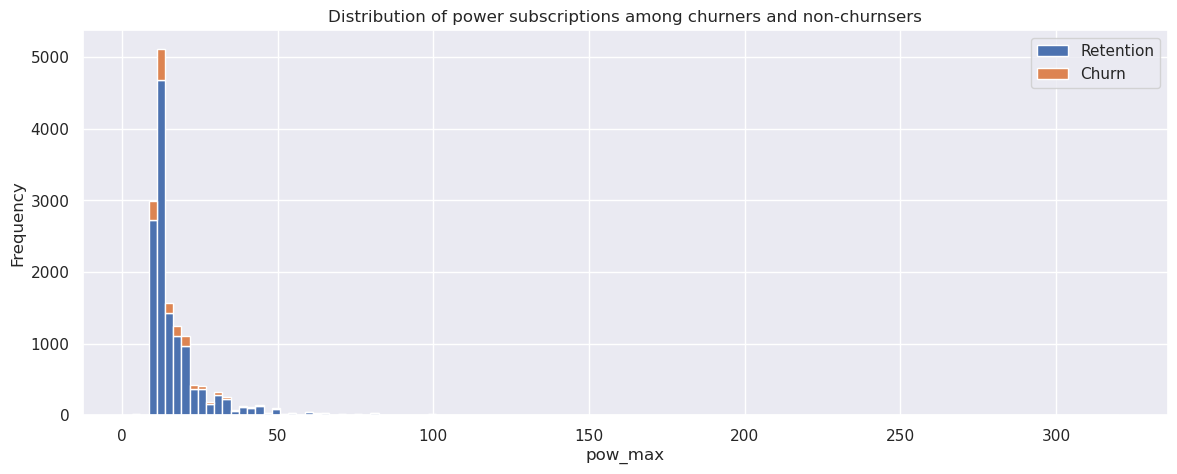

In [13]:
fig, axs = plt.subplots(nrows=1, figsize=(14, 5))
plot_distribution(client_df[['id', 'pow_max', 'churn']], 'pow_max', axs)
plt.title('Distribution of power subscriptions among churners and non-churnsers')
plt.show()

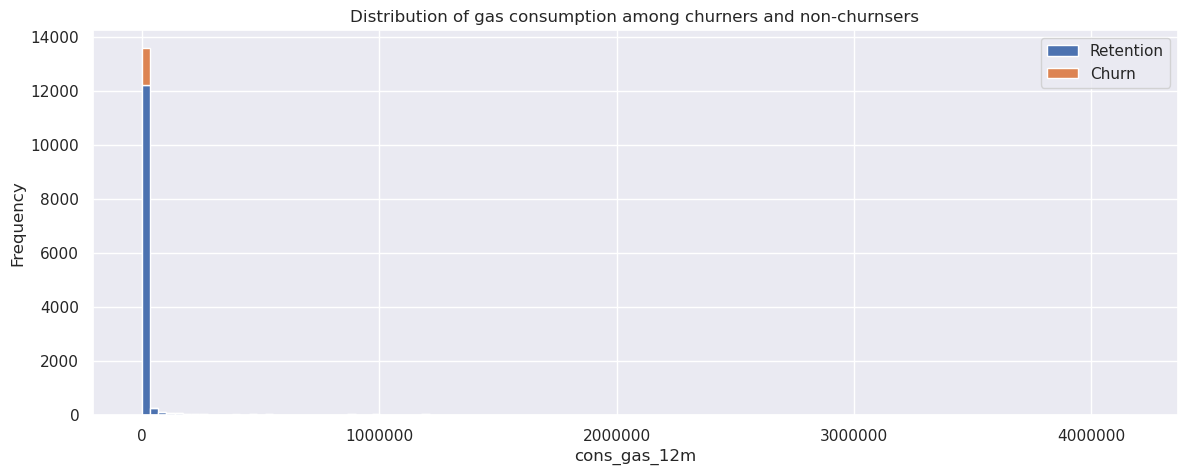

In [14]:
fig, axs = plt.subplots(nrows=1, figsize=(14, 5))
plot_distribution(client_df[['id', 'cons_gas_12m', 'churn']], 'cons_gas_12m', axs)
plt.title('Distribution of gas consumption among churners and non-churnsers')
plt.show()

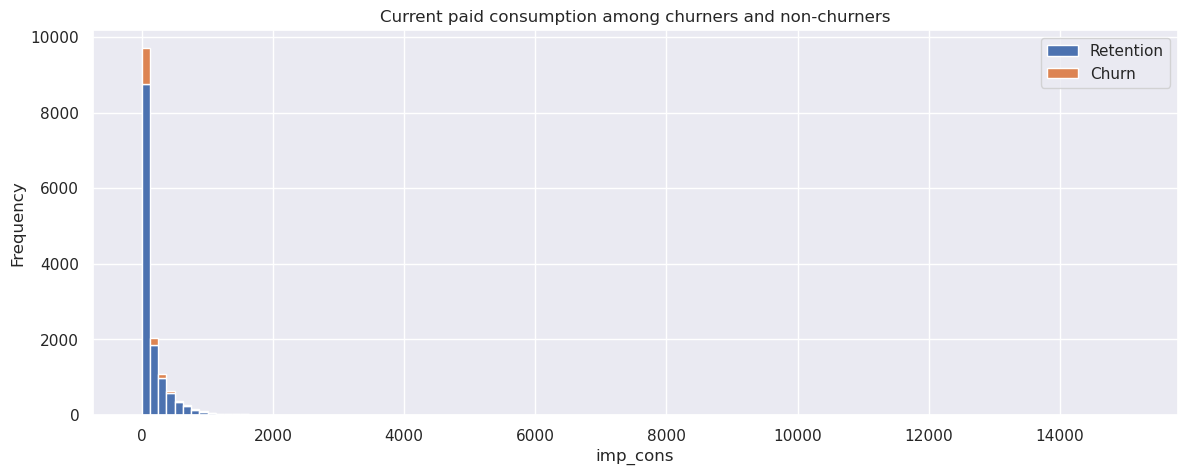

In [15]:
fig, axs = plt.subplots(nrows=1, figsize=(14, 5))
plot_distribution(client_df[['id', 'imp_cons', 'churn']], 'imp_cons', axs)
plt.title('Current paid consumption among churners and non-churners')
plt.show()

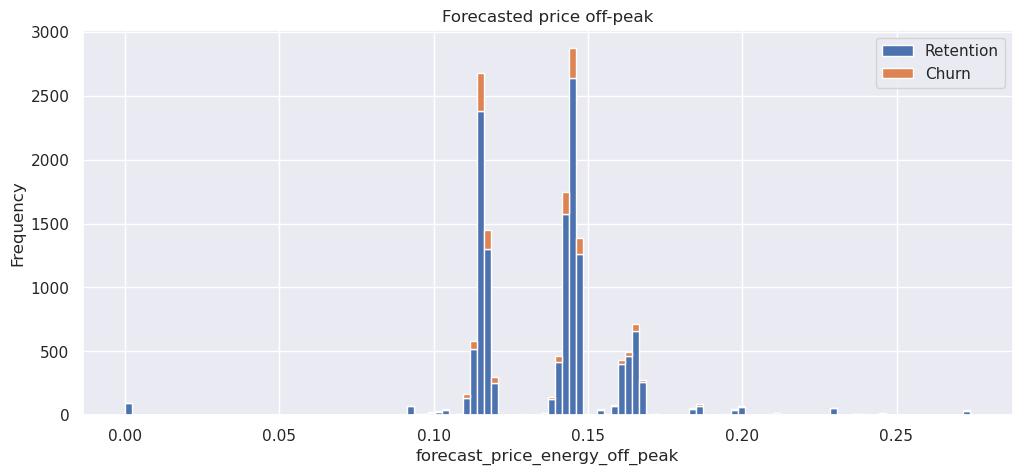

In [25]:
fig, axs = plt.subplots(nrows=1, figsize=(12, 5))
plot_distribution(client_df[['churn', 'forecast_price_energy_off_peak']], 'forecast_price_energy_off_peak', axs)
plt.title('Forecasted price off-peak')
plt.show()


There are apparently 3 price segments for the forecated off-peak price , and in each of those there are churners and retainers. 

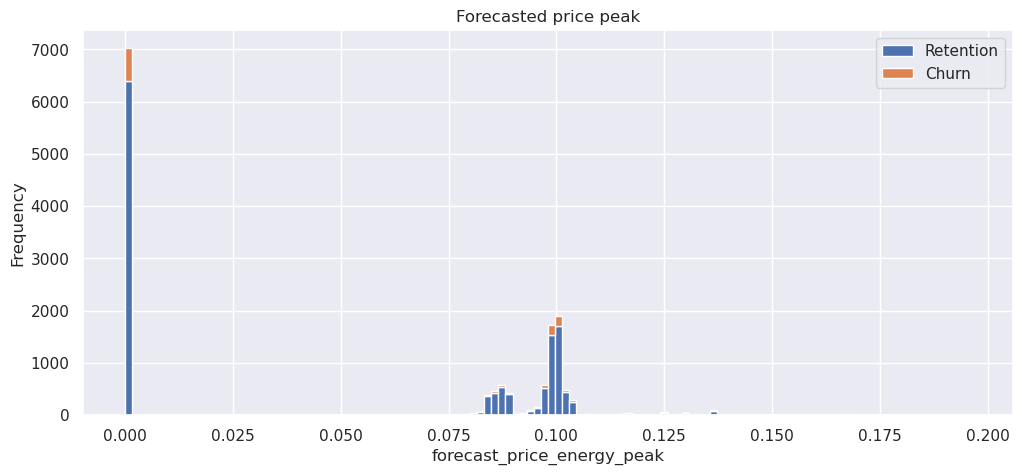

In [27]:
fig, axs = plt.subplots(nrows=1, figsize=(12, 5))
plot_distribution(client_df[['churn', 'forecast_price_energy_peak']], 'forecast_price_energy_peak', axs)
plt.title('Forecasted price peak')
plt.show()

For Majority of companies, peak price is either is not forecasted, however for those having forecast, there are churners and retainers

In [13]:
discount_forecast=client_df.groupby('churn').forecast_discount_energy.value_counts().reset_index(name='count')
#forecasted value for discount is for majority of SMEs not provided, there are same size of discount availble for churners and no churners
discount_forecast

,churn,forecast_discount_energy,count
0,0,0.0,12739
1,0,30.0,230
2,0,28.0,87
3,0,24.0,74
4,0,22.0,40
5,0,25.0,6
6,0,26.0,5
7,0,17.0,2
8,0,19.0,2
9,0,5.0,1


Both, churners and retainers are planed for discount 

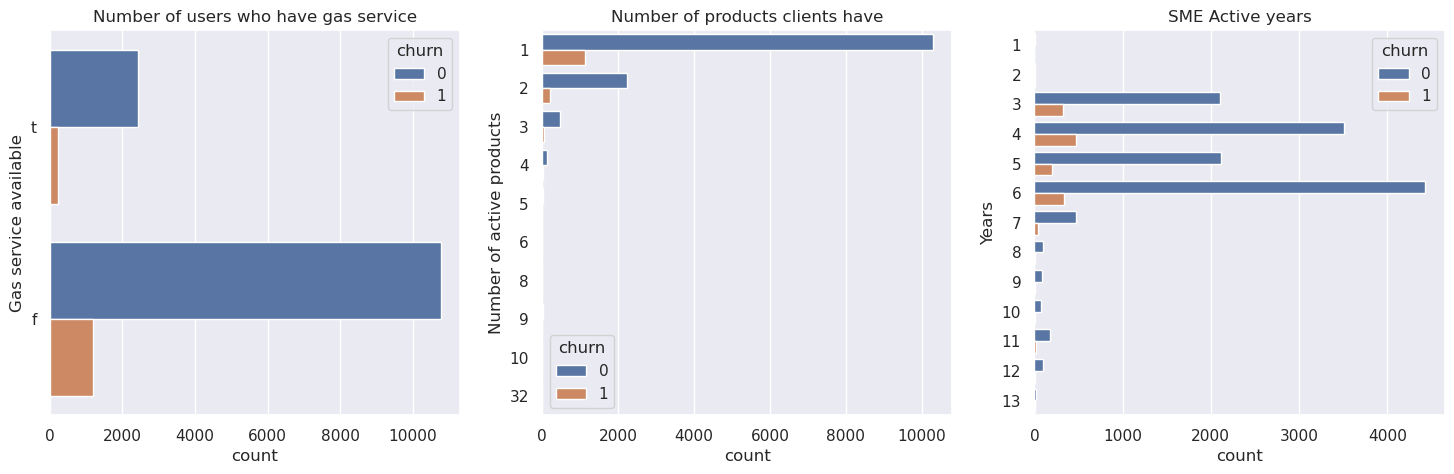

In [6]:
plt.figure(figsize=(18,5))
plt.subplot(131)
sns.countplot(data=client_df, y='has_gas', hue='churn') # churners do purchase gas 
plt.title('Number of users who have gas service')
plt.ylabel('Gas service available')
plt.subplot(132)
sns.countplot(data=client_df, y='nb_prod_act', hue='churn')
plt.title('Number of products clients have')
plt.ylabel('Number of active products')
plt.subplot(133)
sns.countplot(data=client_df, y='num_years_antig', hue='churn')
plt.title('SME Active years')
plt.ylabel('Years')
plt.show()

- Both, Churners and Retainers  use electricity and gas products. 
- What is visible on graphs is that retainers use slightly more products than churners. Most of groups use usually just one product. Churners do not use more than 3 products, while retainers use also more 
- Churner SME are rather companies active up to 7 years,and although retainers are also  mostly younger ones,there are also older than 7 years.  

In [34]:
margins = client_df[['margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin', 'churn']]
grouped =margins.groupby('churn')['net_margin'].mean()
grouped


churn
0    185.057407
1    228.361938
Name: net_margin, dtype: float64

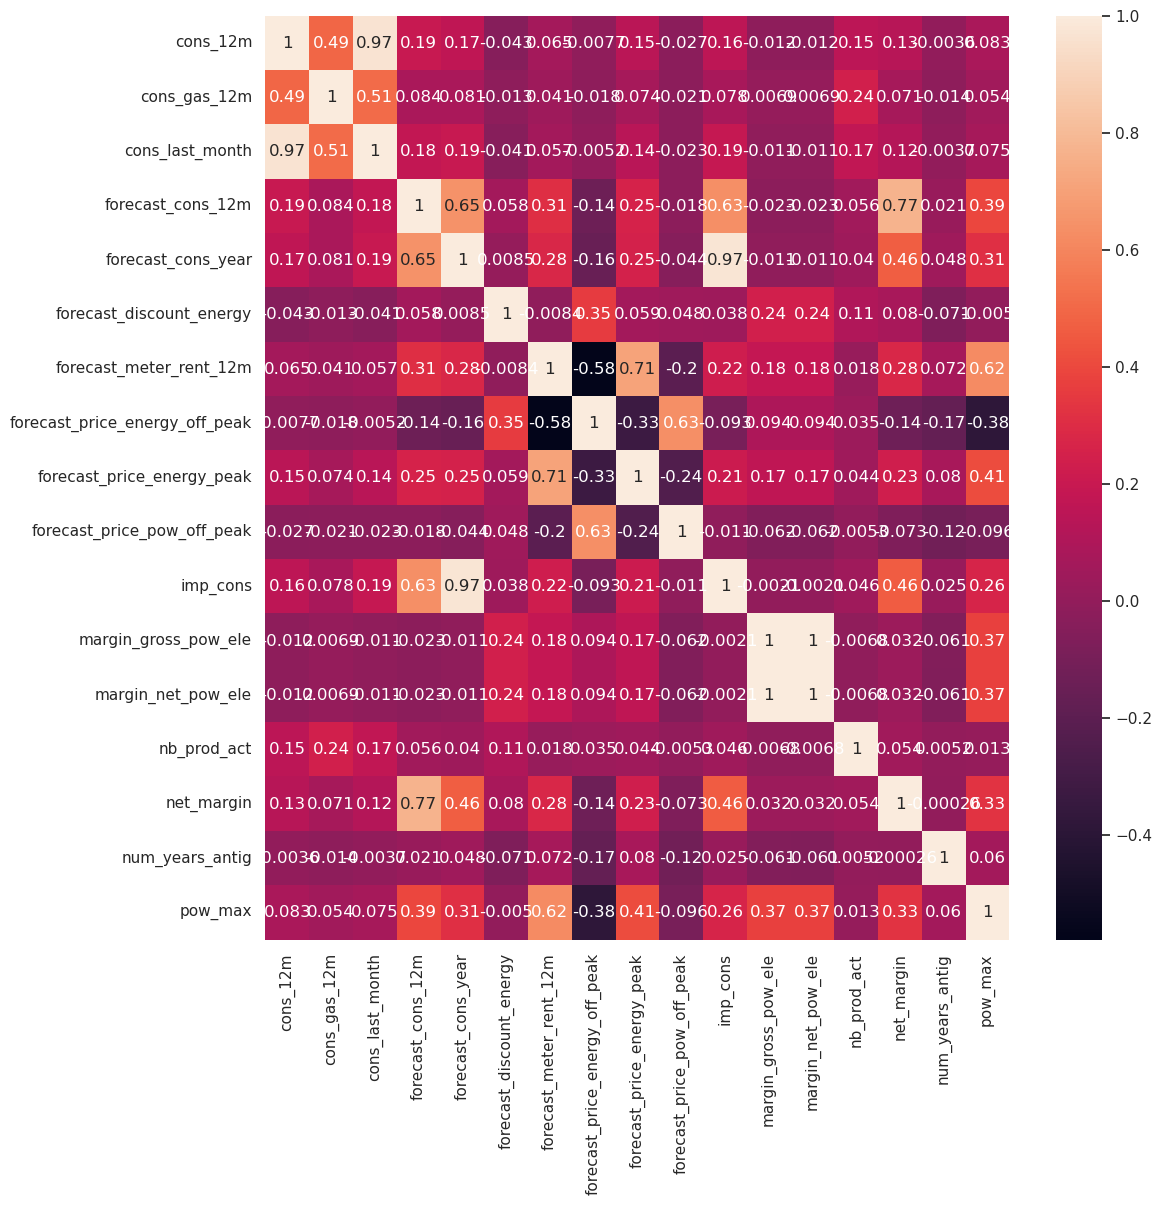

In [24]:
#general corelation of data 
plt.figure(figsize=(12,12))
numeric = client_df.select_dtypes(include=['float', 'int'])
cor = numeric.corr()

sns.heatmap(cor, annot=True)
plt.show()


Looking at  data correclation,  there is some weak negative correlation between:
- Forecast prices on peak and off peak . 
- High correlation between current paid consuption (imp_cons) and forecasted el consution for next year (forecast_cons_year), 
- Perfect positive correlation between gross and net margins on power subscription.
- Further, between consumption in past 12 months (cons_12m) and consumption last month (cons_last_month). quite high between net margin and forecast cons in next 12m

#### Analysing the contractual dates and prices 

In [60]:
print(price_df.shape)
print(price_df.id.value_counts())
#if we check this, we see that df contains unique price info for 16096 customers for different months and we can check how the prices changed 

(193002, 8)
038af19179925da21a25619c5a24b745    12
97589d95ec46ab31ef238d18a616403f    12
97adbcd721fae4874f7ee287ea84200d    12
d74b4544363be674855cf931b6b8af25    12
27276020e48d73f589788d4e37c51879    12
                                    ..
83cf18b07114e495ae8b7fb235e45ee2     8
3e459d61dc831e29f8a9a9a59f95efd2     8
c5dcd5c506e565aaabffa29bc1ec0a37     7
bf89f2d8c1b133a134fd93603cb4c947     7
15b36e47cf04bf151e3f4438d12672e5     7
Name: id, Length: 16096, dtype: int64


As already shown in the beginning and also now, price_df contains several entries for same customer , only difference is the month. To analyze further, it could be possible to:
- analyze overal distribution of prices in the dataset for each price type 
- check price changes per customer and try to visualize 
- calcuate price deltas in 2015 for each customer for fix and variable price segments and see then what customers decided to cancel their subscription 
- calculate average prices in 2015 for each price segment per customer 

    

In [85]:
print('monitoring period per client is app. ', round(193002/16096, 2), 'months') 

monitoring period per client is app.  11.99 months


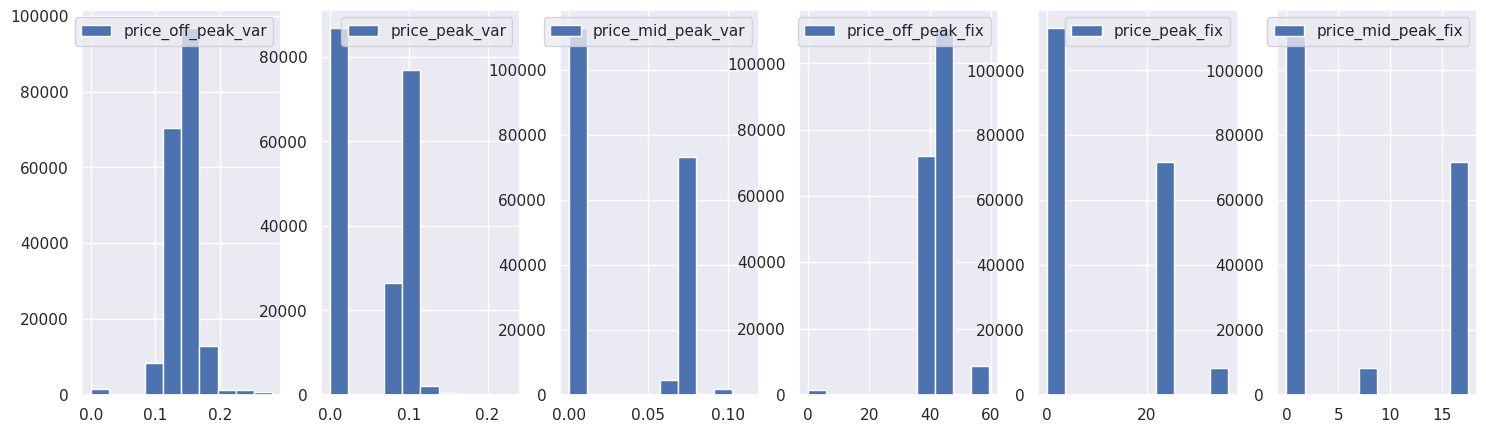

In [61]:
num_price = price_df.select_dtypes(include=('float', 'int'))
plt.figure(figsize=(18,5))
x = 0
for c in num_price.columns:
    plt.subplot(1,6, x+1)
    plt.hist(num_price[c], label=c)
    plt.legend()
    x+=1
plt.show()

Mid-peak and peak prices are in majority of cases 0.00, while off-peak prices are there for majority of customers. Variable prices are between 0.1 and 0.2, while fix part of the price somehwere in range between 40 and 50.  It would be good to first analyse data on the level of one client and see what customers have what kind of price structure . For now it is visible that majority of customers are using electricity in off-peak times, and peak and mid peak prices seem to be the same for majority of  customers.   

there are different price fluctuations for different SMEs . It would be interesting to show :
- Is price for each customer increased or decreased or if there were no fluctuations? 
- Transfer the deltas to client df

In [4]:
#changing the column types and extracting month column 
price_df['price_date']= pd.to_datetime(price_df['price_date'])


In [6]:
price_df.price_date.value_counts()

2015-08-01    16094
2015-12-01    16094
2015-07-01    16090
2015-11-01    16087
2015-06-01    16085
2015-10-01    16085
2015-02-01    16082
2015-09-01    16082
2015-05-01    16080
2015-04-01    16079
2015-03-01    16074
2015-01-01    16070
Name: price_date, dtype: int64

In [5]:
price_df['month'] = price_df['price_date'].dt.month

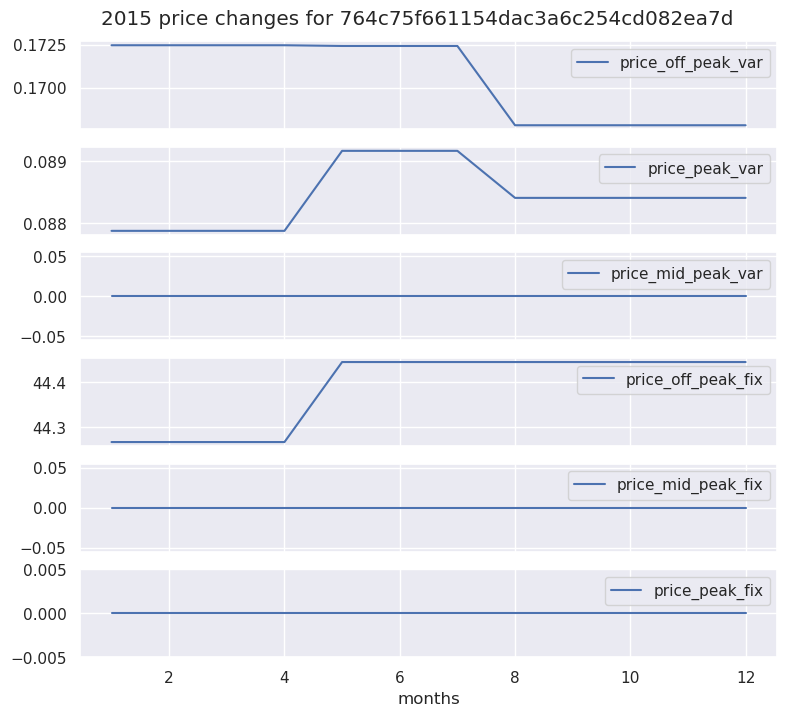

In [33]:
def price_changes_graph(customer_id, df=price_df):
    e = df[df['id']==customer_id].sort_values('price_date')
    rows =6
    cols = 1
    prices = ['price_off_peak_var','price_peak_var','price_mid_peak_var','price_off_peak_fix', 'price_mid_peak_fix', 'price_peak_fix']
    fig, axes = plt.subplots(rows, cols, sharex='all', figsize=(9,8))
    fig.suptitle(f'2015 price changes for {customer_id}', y=0.92)
    for r in range(rows):
        #for c in range(cols) :
        axes[r].plot(e.month, e[prices[r]], label=prices[r])
        plt.ylim(np.min(e[prices[r]])-0.005, np.max(e[prices[r]])+0.005)
        plt.xlabel('months')
        axes[r].legend()

    plt.show()

price_changes_graph('764c75f661154dac3a6c254cd082ea7d')


In [64]:
def df_price_deltas(customers, df= price_df ):
    ''' 
    create new df containing user id, price deltas in 2015
    customer_id is list of unique ids in price_df
    some have no changes and some do 
    return : new df containing user_id, delta (positive or negative)
    between 1st and last month in 2015 for each price type 
    '''
    delta_dict = {'id':[], 'delta_price_off_peak_var':[],'delta_price_peak_var':[],'delta_price_mid_peak_var':[], 'delta_price_off_peak_fix':[],'delta_price_peak_fix':[],\
        'delta_price_mid_peak_fix':[], 'avg_price_off_peak_var':[], 'avg_price_peak_var':[], 'avg_price_mid_peak_var':[], 'avg_price_off_peak_fix':[], \
        'avg_price_peak_fix':[], 'avg_price_mid_peak_fix':[]}
    for customer in customers:
        e = df[df['id']==customer].sort_values('price_date')
        delta_dict['id'].append(customer)
        delta_off_peak_var = e.iloc[-1, 2] - e.iloc[0,2]
        delta_peak_var = e.iloc[-1, 3] - e.iloc[0,3]
        delta_mid_peak_var = e.iloc[-1, 4] - e.iloc[0,4]
        delta_off_peak_fix = e.iloc[-1, 5] - e.iloc[0,5]
        delta_peak_fix = e.iloc[-1, 6] - e.iloc[0,6]
        delta_mid_peak_fix = e.iloc[-1, 7] - e.iloc[0,7]
        delta_dict['delta_price_off_peak_var'].append(round(delta_off_peak_var,4))
        delta_dict['delta_price_peak_var'].append(round(delta_peak_var,4))
        delta_dict['delta_price_mid_peak_var'].append(round(delta_mid_peak_var,4))
        delta_dict['delta_price_off_peak_fix'].append(round(delta_off_peak_fix,4))
        delta_dict['delta_price_peak_fix'].append(round(delta_peak_var,4))
        delta_dict['delta_price_mid_peak_fix'].append(round(delta_mid_peak_var,4))
        delta_dict['avg_price_off_peak_var'].append(round(e.iloc[:,2].sum()/len(e),4))
        delta_dict['avg_price_peak_var'].append(round(e.iloc[:,3].sum()/len(e),4))
        delta_dict['avg_price_mid_peak_var'].append(round(e.iloc[:,4].sum()/len(e),4))
        delta_dict['avg_price_off_peak_fix'].append(round(e.iloc[:,5].sum()/len(e),4))
        delta_dict['avg_price_peak_fix'].append(round(e.iloc[:,6].sum()/len(e),4))
        delta_dict['avg_price_mid_peak_fix'].append(round(e.iloc[:,7].sum()/len(e),4))

    return delta_dict

In [65]:
customer_ids = price_df['id'].unique()

deltas = df_price_deltas(customer_ids)

#trial


In [66]:
deltas_df = pd.DataFrame.from_dict(deltas)
deltas_df.head()

,id,delta_price_off_peak_var,delta_price_peak_var,delta_price_mid_peak_var,delta_price_off_peak_fix,delta_price_peak_fix,delta_price_mid_peak_fix,avg_price_off_peak_var,avg_price_peak_var,avg_price_mid_peak_var,avg_price_off_peak_fix,avg_price_peak_fix,avg_price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,-0.0055,0.0000,0.0000,0.1778,0.0000,0.0000,0.1485,0.0000,0.0000,44.3558,0.0000,0.0000
1,31f2ce549924679a3cbb2d128ae9ea43,-0.0072,-0.0023,0.0036,0.1629,-0.0023,0.0036,0.1230,0.1026,0.0735,40.6610,24.3966,16.2644
2,36b6352b4656216bfdb96f01e9a94b4e,-0.0100,-0.0051,0.0008,0.1629,-0.0051,0.0008,0.1189,0.0984,0.0690,40.6339,24.3803,16.2535
3,48f3e6e86f7a8656b2c6b6ce2763055e,-0.0005,0.0000,0.0000,0.1778,0.0000,0.0000,0.1456,0.0000,0.0000,44.4003,0.0000,0.0000
4,cce88c7d721430d8bd31f71ae686c91e,-0.0393,-0.0332,-0.0289,-0.3351,-0.0332,-0.0289,0.1317,0.1121,0.0820,40.8549,24.5960,16.4665


In [67]:
client_df = client_df.merge(deltas_df, left_on='id', right_on= 'id')

In [69]:
#we are dropping off consumption_rate 
client_df = client_df.drop(['channel_sales','origin_up', 'consumption_rate'], axis=1)

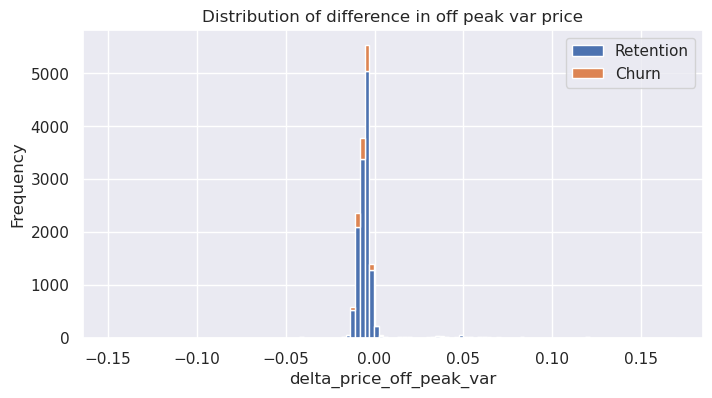

In [73]:
fig, axs = plt.subplots(nrows=1, figsize=(8, 4))
plot_distribution(client_df[['churn', 'delta_price_off_peak_var']], 'delta_price_off_peak_var', axs)
plt.title('Distribution of difference in off peak var price')
plt.show()

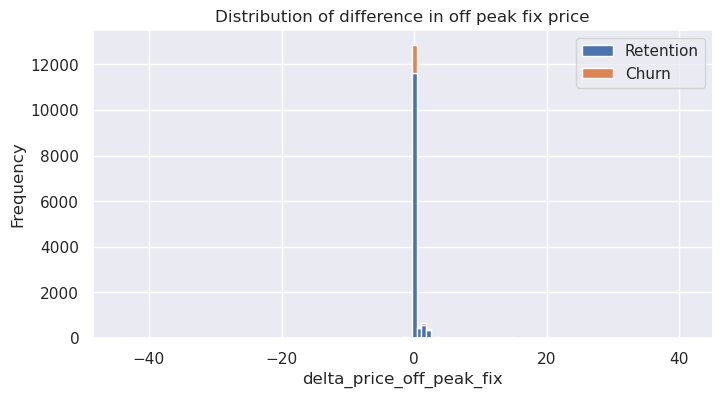

In [74]:
fig, axs = plt.subplots(nrows=1, figsize=(8, 4))
plot_distribution(client_df[['churn', 'delta_price_off_peak_fix']], 'delta_price_off_peak_fix', axs)
plt.title('Distribution of difference in off peak fix price')
plt.show()

- Variable part of off pike price, changed differently it can be noticed that for majority of churners and retainers it reduced, and for only small part of customers var off-peak price increased
- When we check the off peak fix price, delta is positive, so price increased and that is the case for churners and retainers, although share of churners who got this price increase is very small comparing to retainers.   

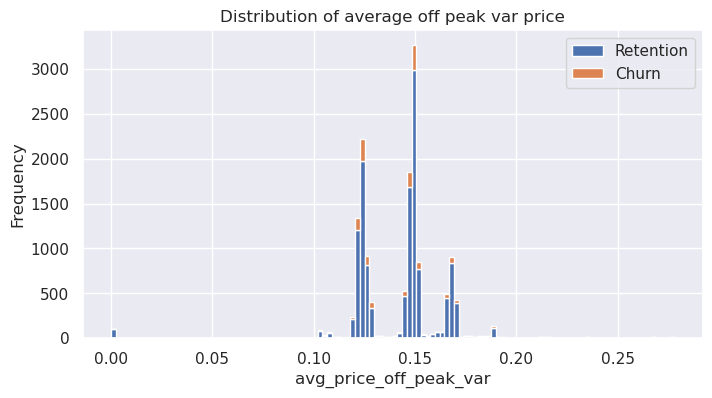

In [76]:
fig, axs = plt.subplots(nrows=1, figsize=(8, 4))
plot_distribution(client_df[['churn', 'avg_price_off_peak_var']], 'avg_price_off_peak_var', axs)
plt.title('Distribution of average off peak var price')
plt.show()

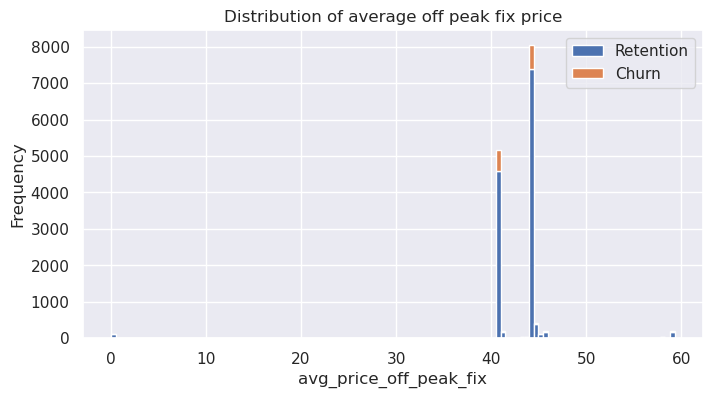

In [82]:
fig, axs = plt.subplots(nrows=1, figsize=(8, 4))
plot_distribution(client_df[['churn', 'avg_price_off_peak_fix']], 'avg_price_off_peak_fix', axs)
plt.title('Distribution of average off peak fix price')
plt.show()

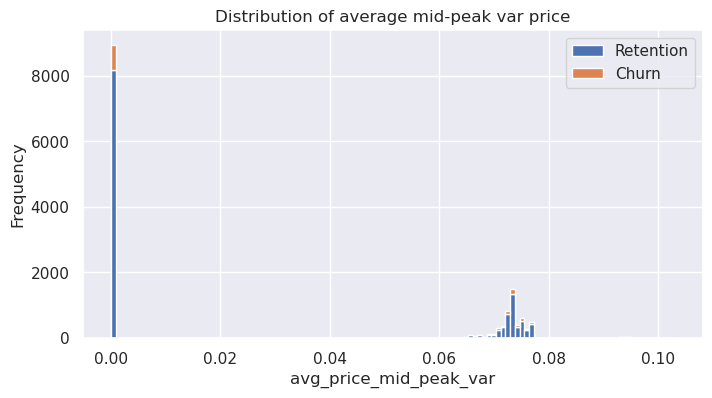

In [83]:
fig, axs = plt.subplots(nrows=1, figsize=(8, 4))
plot_distribution(client_df[['churn', 'avg_price_mid_peak_var']], 'avg_price_mid_peak_var', axs)
plt.title('Distribution of average mid-peak var price')
plt.show()

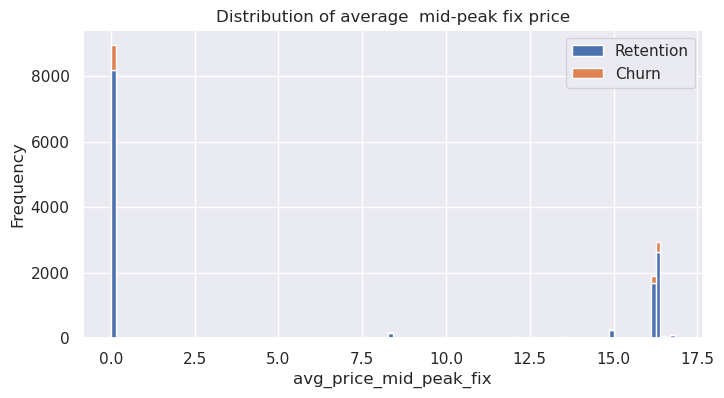

In [79]:
fig, axs = plt.subplots(nrows=1, figsize=(8, 4))
plot_distribution(client_df[['churn', 'avg_price_mid_peak_fix']], 'avg_price_mid_peak_fix', axs)
plt.title('Distribution of average  mid-peak fix price')
plt.show()

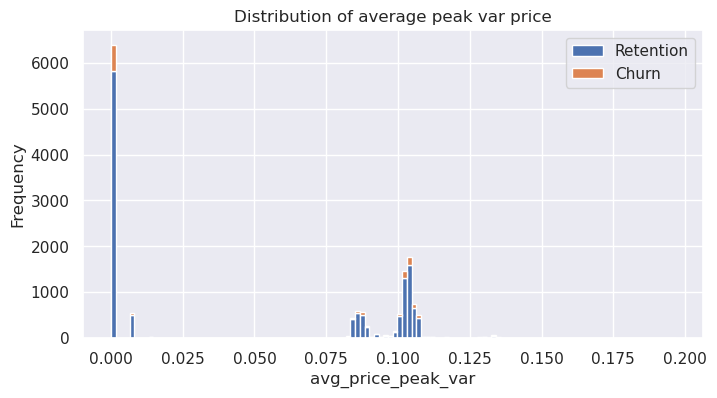

In [80]:
fig, axs = plt.subplots(nrows=1, figsize=(8, 4))
plot_distribution(client_df[['churn', 'avg_price_peak_var']], 'avg_price_peak_var', axs)
plt.title('Distribution of average peak var price')
plt.show()

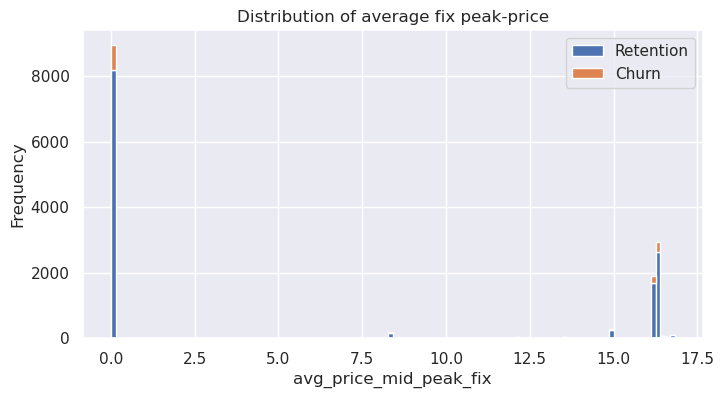

In [84]:
fig, axs = plt.subplots(nrows=1, figsize=(8, 4))
plot_distribution(client_df[['churn', 'avg_price_mid_peak_fix']], 'avg_price_mid_peak_fix', axs)
plt.title('Distribution of average fix peak-price')
plt.show()

Last couple of histograms show distribution of differences in off-peak prices, as well as distribution of average prices for all availyble price types. 
Price changes are mostly visible on off-peak prices. Off-peak fix price did not change much in 2015, but for small portion of mostly retainers it went up.
What can be visible that for churners avg off-peak price is the one which majority of clients have, while some retainers do have small price corrections to up. Therefore, there are no special low prices for retainers which make them stay, seems like all customers get same treatement. 

Mid-peak, and peak prices are usually 0, therefore presumably not used by majority of clients. 

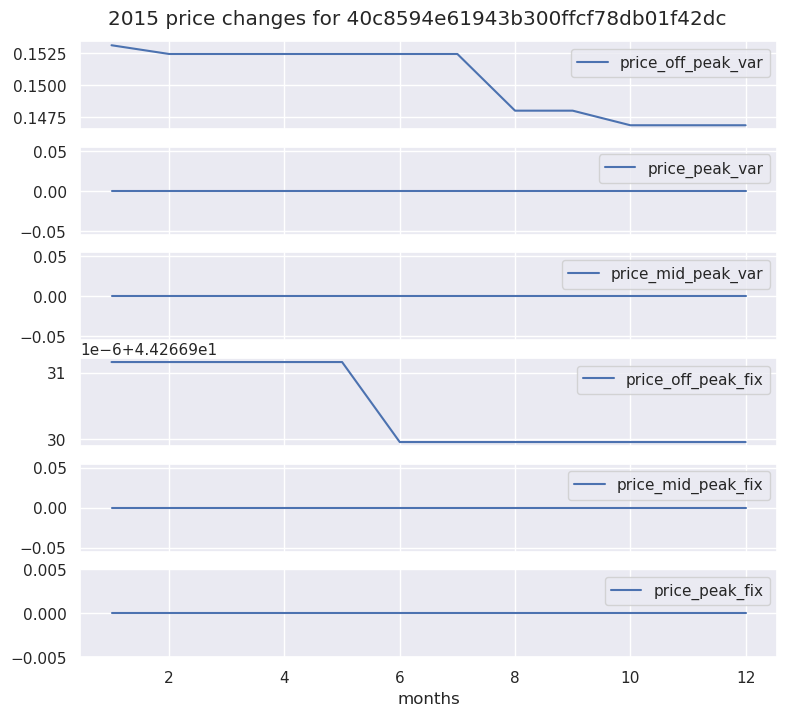

In [46]:
example_churner = client_df[client_df['churn']==1].sample()
example_retainer =client_df[client_df['churn']==0].sample()

#chrner's price changes 
price_changes_graph(example_churner.id.values[0])


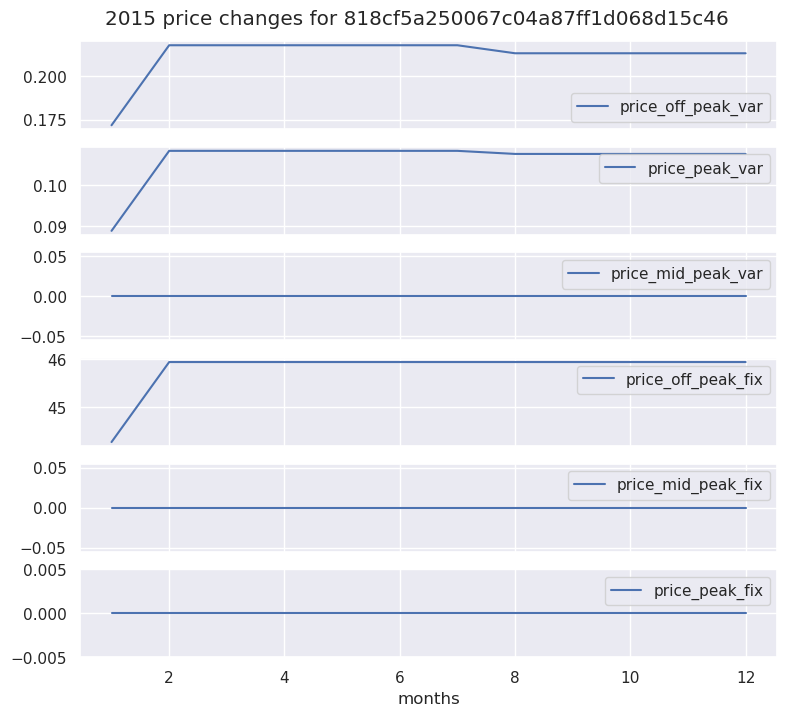

In [47]:
#retainer's price changes  
price_changes_graph(example_retainer.id.values[0])

- On this random example for client who canceled and client who did not cancel the contract we see that churner actually received price discounts, while retainer got price increases for fix and var part.
- Also what can we see here is that, off peak fix price for retainer increased from 44 to 46 and variable part increased from 0.175 to app 0.225, while for churner off peak price reduced from over 31 to 30, and variable off peak price reduced from 0.15 to below 0.1475. 
- This is just an example and it does not mean that the every churner was having same price changes   